## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [462]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from geopy.distance import geodesic
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
#importing pandas to read csv file
# Your code here - remember to use markdown cells for comments as well!

In [340]:
kcdf = pd.read_csv('../data/kc_house_data.csv')
#dataset

In [341]:
kcdf = kcdf.drop(columns = 'date')

In [342]:
kcdf = kcdf.dropna()

In [343]:
kcdf

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


In [344]:
def zip_code(address):
    x = address.split(' ')[-3]

    return x.split(',')[0]

In [345]:
kcdf['zip_code'] = kcdf['address'].apply(lambda x: zip_code(x))

In [346]:
kcdf['zip_code'] = kcdf['zip_code'].astype(int)

In [347]:
kcdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   price          30111 non-null  float64
 2   bedrooms       30111 non-null  int64  
 3   bathrooms      30111 non-null  float64
 4   sqft_living    30111 non-null  int64  
 5   sqft_lot       30111 non-null  int64  
 6   floors         30111 non-null  float64
 7   waterfront     30111 non-null  object 
 8   greenbelt      30111 non-null  object 
 9   nuisance       30111 non-null  object 
 10  view           30111 non-null  object 
 11  condition      30111 non-null  object 
 12  grade          30111 non-null  object 
 13  heat_source    30111 non-null  object 
 14  sewer_system   30111 non-null  object 
 15  sqft_above     30111 non-null  int64  
 16  sqft_basement  30111 non-null  int64  
 17  sqft_garage    30111 non-null  int64  
 18  sqft_p

In [567]:
kc_zips = [98001, 98002,98003, 98004,98005,98006, 98007,98008,98009, 98010, 98011, 98013, 98014,98015,98019,98022,98023,98024,98025,98027,98028,98029,98030,98031,98032,98033,98034,98035,98038,98039,98040,98041,98042,98045,98047,98050,98051,98052,98053,98054,98055,98056,98057,98058,98059,98062,98063,98064,98065,98070,98071,98072,98073,98074,98075,98077,98083,98089,98092,98093,98101,98102,98103,98104,98105,98106,98107,98108,98109,98111,98112,98113,98114,98115,98116,98117,98118,98119,98121,98122,98124,98125,98126,98127,98129,98131,98132,98133,98134,98136,98138,98139,98141,98144,98145,98146,98148,98151,98154,98155,98158,98160,98161,98164,98165,98166,98168,98170,98171,98174,98175,98177,98178,98181,98184,98185,98188,98190,98191,98194,98195,98198,98199,98224,98288]

In [568]:
realkcdf = kcdf[kcdf['zip_code'].isin(kc_zips)]

In [569]:
realkcdf['zip_code'].nunique()

76

In [433]:
def geo_distance(coord_a, coord_b):
    #take two coordinates and calculate distances in miles
    
    return geodesic(coord_a, coord_b).miles

In [434]:
amzn_coord = (47.615722, -122.339494)

In [435]:
realkcdf['location'] = list(zip(realkcdf.lat, realkcdf.long))

<ipython-input-435-2235ebd3b5f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  realkcdf['location'] = list(zip(realkcdf.lat, realkcdf.long))


In [437]:
realkcdf['distance_to_amazon'] = realkcdf['location'].apply(lambda x: geodesic(x, amzn_coord).miles)

<ipython-input-437-7c2334c10c53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  realkcdf['distance_to_amazon'] = realkcdf['location'].apply(lambda x: geodesic(x, amzn_coord).miles)


In [438]:
data_near_amzn = realkcdf[realkcdf['distance_to_amazon'] <= 3]

In [439]:
data_near_amzn_filt = data_near_amzn[data_near_amzn['price'] < 10000000]

In [440]:
data_near_amzn_filt

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zip_code,location,distance_to_amazon
88,9828702665,1061000.0,3,2.5,1490,959,2.0,NO,NO,NO,...,0,0,2005,0,"1826B 24th Ave, Seattle, Washington 98122, Uni...",47.618300,-122.301050,98122,"(47.6183, -122.30105)",1.804614
96,2749600270,850000.0,4,2.0,1740,5760,2.0,NO,NO,NO,...,0,130,1949,0,"3433 9th Avenue West, Seattle, Washington 9811...",47.651550,-122.369180,98119,"(47.65155, -122.36918)",2.836970
97,424049012,725000.0,4,3.5,1630,1717,3.0,NO,NO,NO,...,260,0,2009,0,"820 28th Avenue South, Seattle, Washington 981...",47.595175,-122.296265,98144,"(47.595175, -122.296265)",2.468694
130,5317100105,4424080.0,4,3.5,2940,7200,2.0,NO,NO,NO,...,0,100,1925,0,"1115 41st Avenue East, Seattle, Washington 981...",47.629070,-122.280365,98112,"(47.62907, -122.280365)",2.911650
152,1930300726,1475000.0,4,2.5,2350,3040,2.0,NO,NO,YES,...,460,310,1989,0,"4119 Dayton Avenue North, Seattle, Washington ...",47.657250,-122.352870,98103,"(47.65725, -122.35287)",2.936207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30105,6003501586,1384375.0,4,3.0,2010,3200,1.5,NO,NO,YES,...,0,70,1901,1988,"1122 East John Street, Seattle, Washington 981...",47.620125,-122.317155,98102,"(47.620125, -122.317155)",1.086918
30120,5244801455,1400000.0,3,2.0,2560,6441,2.0,NO,NO,NO,...,0,190,1908,0,"153 Newell Street, Seattle, Washington 98109, ...",47.644480,-122.354280,98109,"(47.64448, -122.35428)",2.103351
30123,7234600807,969000.0,3,2.5,1660,1795,2.0,NO,NO,NO,...,200,70,2000,0,"914A 17th Ave, Seattle, Washington 98122, Unit...",47.610500,-122.310050,98122,"(47.6105, -122.31005)",1.422021
30141,6362900076,815000.0,3,2.0,1330,1191,2.0,NO,NO,NO,...,0,0,2010,0,"724 25th Ave S, Seattle, Washington 98144, Uni...",47.596470,-122.299840,98144,"(47.59647, -122.29984)",2.280688


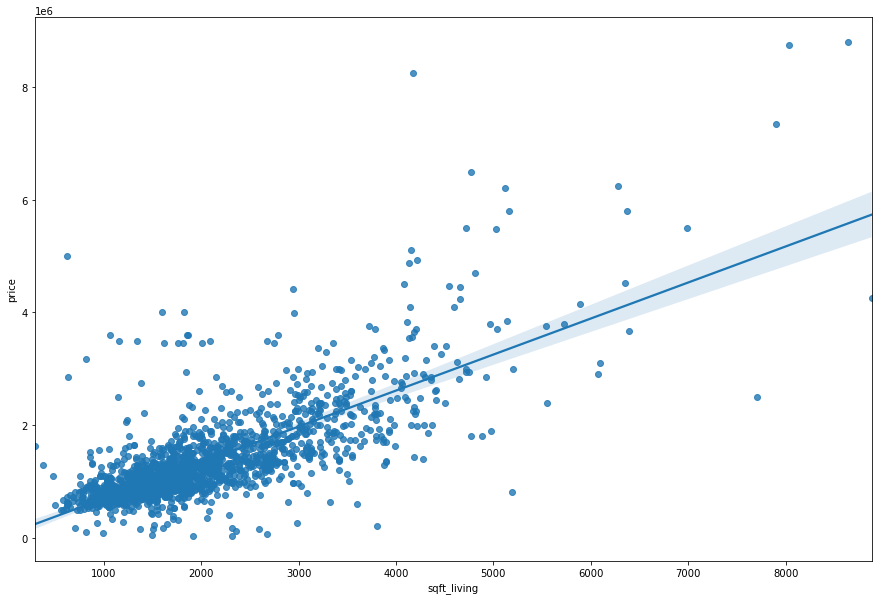

In [537]:
fig, ax = plt.subplots(figsize = (15,10))

x = data_near_amzn_filt['sqft_living']
y = data_near_amzn_filt['price']
hue = data_near_amzn_filt['bedrooms']
size = data_near_amzn_filt['bathrooms']


sns.regplot(x = x, y = y,  ax=ax);


In [350]:
#am_cords = (47.615722, -122.339494)

In [351]:
#kcdf['location'] = list(zip(kcdf.lat, kcdf.long))

In [352]:
#kcdf['distance_to_amazon'] = kcdf['location'].apply(lambda x: geodesic(x, am_cords).miles)

In [353]:
#closekcdf = kcdf[kcdf['distance_to_amazon'] <= 10]

In [354]:
#closekcdf

In [355]:
#q1 = realkcdf['price'].quantile(.25)
#q3 = realkcdf['price'].quantile(.75)
#IQR = q3 - q1
#outliers = realkcdf[((realkcdf['price']<(q1-1.5*IQR)) | (realkcdf['price']>(q3+1.5*IQR)))]

In [356]:
#outliers

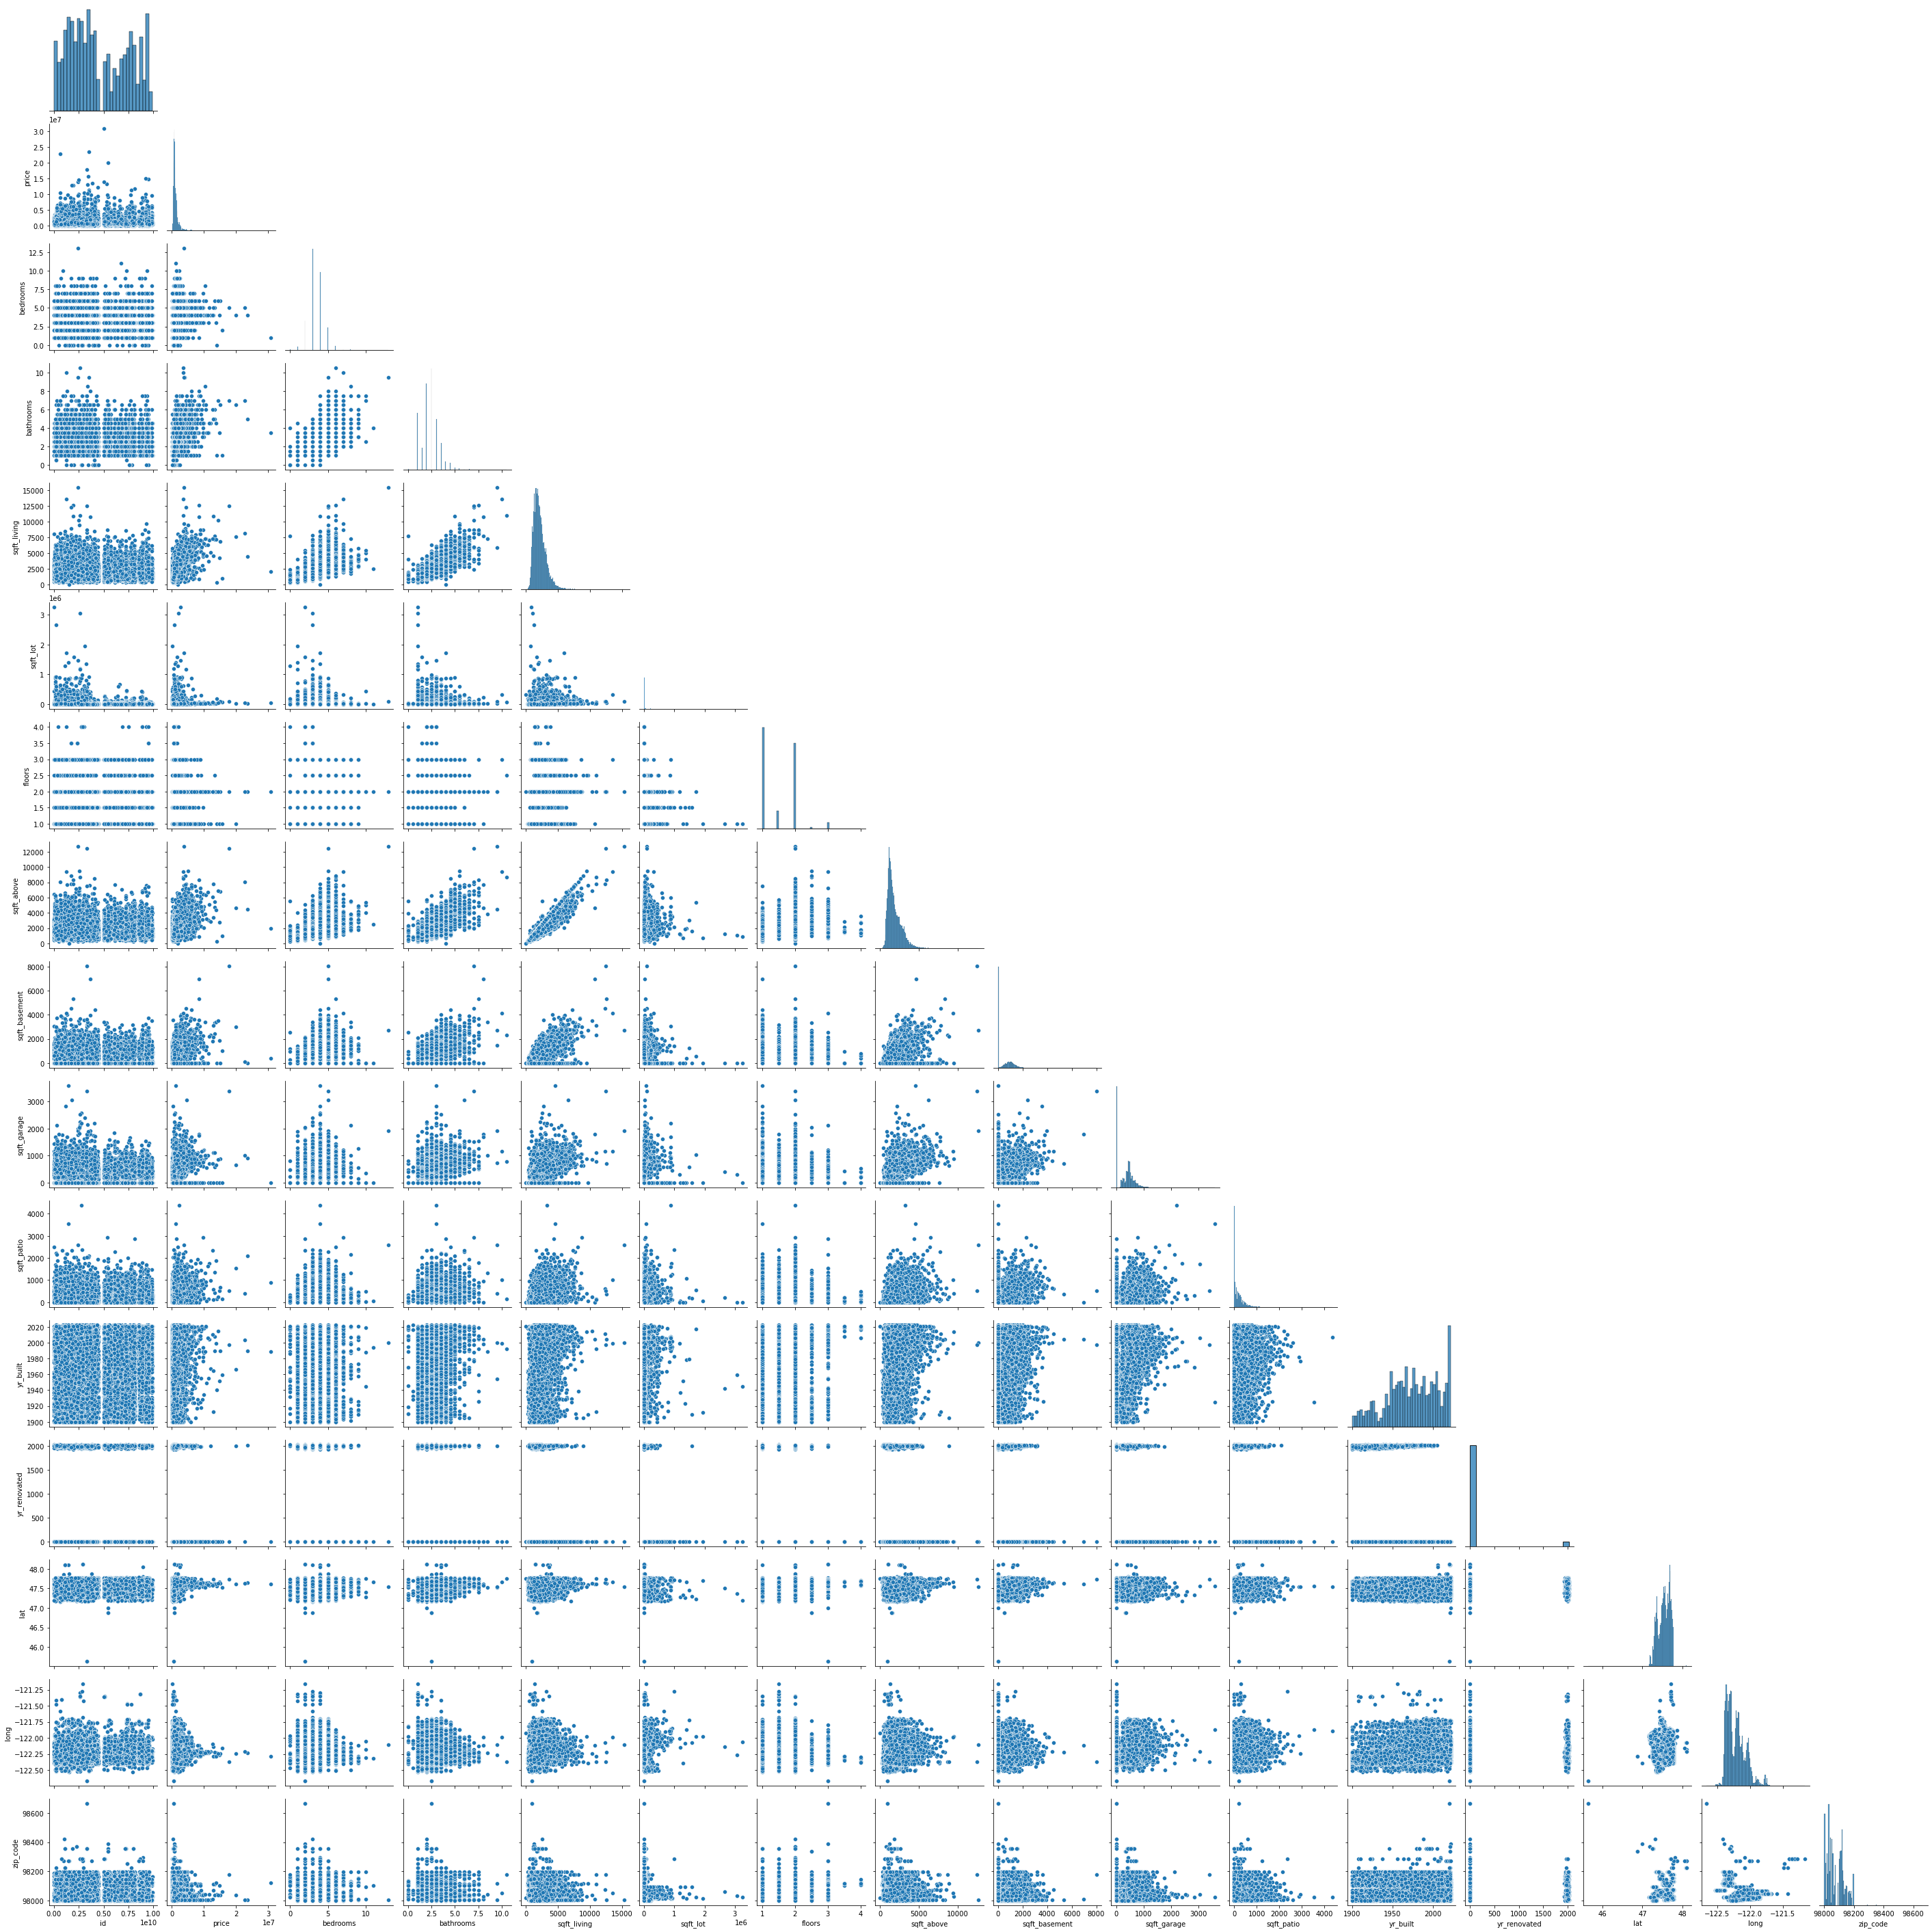

In [357]:
sns.pairplot(realkcdf, corner = True)

<AxesSubplot:>

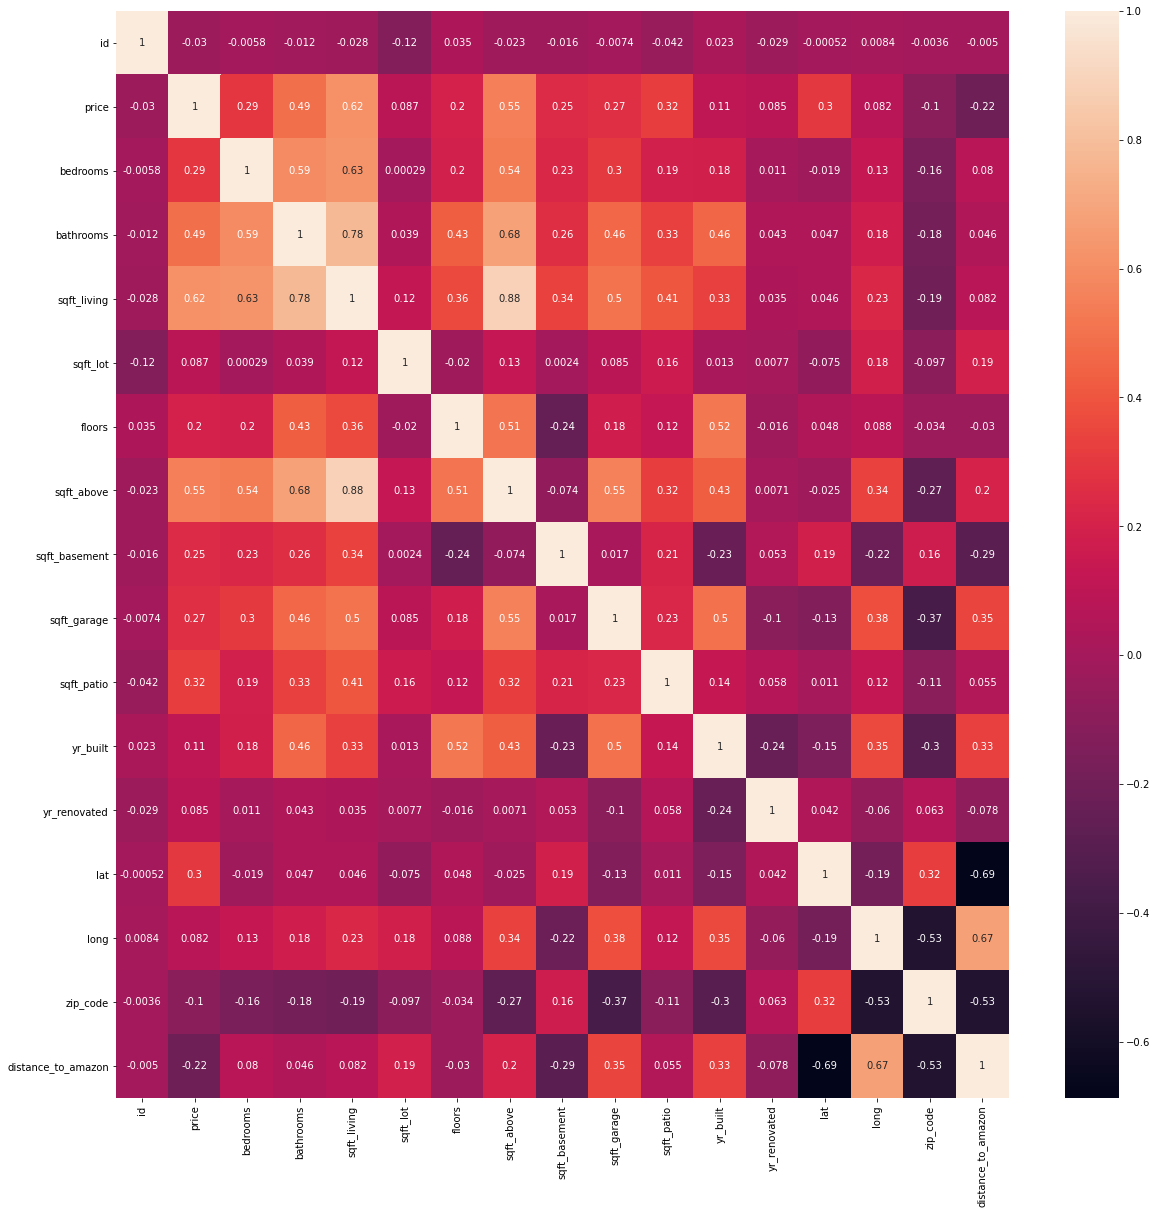

In [441]:
plt.figure(figsize = (20,20))
sns.heatmap(realkcdf.corr(), annot = True)

In [570]:
realkcdf[(realkcdf['zip_code'] 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zip_code
0,7399300360,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055
1,8910500230,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133
2,1180000275,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178
3,1604601802,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118
4,8562780790,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,...,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103
30151,194000695,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,...,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116
30152,7960100080,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,...,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122
30153,2781280080,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,...,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,98055


In [442]:
realkcdf['grade'].unique()

array(['7 Average', '9 Better', '8 Good', '6 Low Average', '10 Very Good',
       '5 Fair', '11 Excellent', '12 Luxury', '4 Low', '13 Mansion',
       '3 Poor', '2 Substandard'], dtype=object)

In [443]:
realkcdf['condition'].unique()

array(['Good', 'Average', 'Very Good', 'Fair', 'Poor'], dtype=object)

In [444]:
grade_list = ['2 Substandard','3 Poor','4 Low','5 Fair','6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good', '11 Excellent','12 Luxury','13 Mansion']
cond_list = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
view_list = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']

In [445]:
o_enc = OrdinalEncoder(categories = [grade_list, cond_list, view_list])
ord_df =pd.DataFrame(o_enc.fit_transform(realkcdf[['grade', 'condition', 'view']]), columns = realkcdf[['grade', 'condition', 'view']].columns)

In [446]:
new_kcdf = pd.concat([realkcdf.reset_index().drop(columns = ['grade', 'condition', 'view']), ord_df],1)

In [482]:
new_kcdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29149 entries, 0 to 29148
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               29149 non-null  int64  
 1   id                  29149 non-null  int64  
 2   price               29149 non-null  float64
 3   bedrooms            29149 non-null  int64  
 4   bathrooms           29149 non-null  float64
 5   sqft_living         29149 non-null  int64  
 6   sqft_lot            29149 non-null  int64  
 7   floors              29149 non-null  float64
 8   waterfront          29149 non-null  object 
 9   greenbelt           29149 non-null  object 
 10  nuisance            29149 non-null  object 
 11  heat_source         29149 non-null  object 
 12  sewer_system        29149 non-null  object 
 13  sqft_above          29149 non-null  int64  
 14  sqft_basement       29149 non-null  int64  
 15  sqft_garage         29149 non-null  int64  
 16  sqft

In [468]:
onehot_enc = OneHotEncoder(sparse = True, handle_unknown = 'ignore')

In [469]:
nominal_cols = ['waterfront', 'greenbelt', 'heat_source', 'sewer_system','zip_code', 'nuisance']

In [470]:
ohe_df =onehot_enc.fit_transform(new_kcdf[nominal_cols])

In [471]:
nominal_df = pd.DataFrame(ohe_df.toarray(),columns = onehot_enc.get_feature_names())

In [472]:
cleandf = pd.concat([new_kcdf.drop(columns = ['waterfront', 'greenbelt', 'heat_source', 'sewer_system', 'zip_code', 'nuisance']), nominal_df],1)

In [473]:
cleandf

,index,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,...,x4_98168,x4_98177,x4_98178,x4_98188,x4_98198,x4_98199,x4_98224,x4_98288,x5_NO,x5_YES
0,0,7399300360,675000.0,4,1.0,1180,7140,1.0,1180,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,8910500230,920000.0,5,2.5,2770,6703,1.0,1570,1570,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,1180000275,311000.0,6,2.0,2880,6156,1.0,1580,1580,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,1604601802,775000.0,3,3.0,2160,1400,2.0,1090,1070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,8562780790,592500.0,2,2.0,1120,758,2.0,1120,550,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29144,30150,7834800180,1555000.0,5,2.0,1910,4000,1.5,1600,1130,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29145,30151,194000695,1313000.0,3,2.0,2020,5800,2.0,2020,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29146,30152,7960100080,800000.0,3,2.0,1620,3600,1.0,940,920,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29147,30153,2781280080,775000.0,3,2.5,2570,2889,2.0,1830,740,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [474]:
lr = LinearRegression()

In [554]:
col_select = cleandf.drop(columns = ['price', 'id', 'index', 'address','sqft_garage', 'location']).columns
X = cleandf[col_select]
y = cleandf['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [540]:
lr.fit(X_train, y_train)

LinearRegression()

In [541]:
lr.score(X_train, y_train)

0.6493439433476235

In [542]:
y_pred = lr.predict(X_test)
y_pred[0:10]

array([ 926488.4032201 , 2122340.88633194,  806447.30265415,
        927586.50725914, 1515985.62394467, 1020198.19154566,
        760810.99129479, 1247175.11579439,  532564.91513068,
       2141954.34456566])

In [514]:
lr.score(X_train,y_train)

0.6416837789079242

In [515]:
MAE = mean_absolute_error(y_pred, y_test)
MAE

262864.2332892041

In [555]:
ss = StandardScaler()

In [556]:
ss.fit(X_train)

StandardScaler()

In [557]:
X_standardized_train = ss.fit_transform(X_train)

In [558]:
X_standardized_test = ss.transform(X_test)

In [559]:

lr.fit(X_standardized_train, y_train)

lr.score(X_standardized_train, y_train)

0.6600639499558458

In [560]:
lr.score(X_standardized_test, y_test)
ss_preds = lr.predict(X_standardized_test)

In [522]:
#mean_absolute_error(y_pred, y_test)

262864.2332892041

In [566]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_patio,yr_built,yr_renovated,...,x4_98168,x4_98177,x4_98178,x4_98188,x4_98198,x4_98199,x4_98224,x4_98288,x5_NO,x5_YES
27112,5,7.5,8000,23985,2.0,6720,2050,1780,2009,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7991,3,2.0,1500,13450,1.0,1500,0,0,1959,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25899,3,1.0,980,11100,1.0,980,0,130,1955,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12447,3,3.0,4600,14178,2.0,3000,1620,980,1941,1994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28688,3,1.0,2200,3500,1.5,1880,900,140,1912,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3971,6,1.5,2080,9960,1.0,1040,1040,140,1961,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10340,3,2.5,1700,7315,1.0,1100,1090,110,1977,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27906,3,2.5,1710,9999,1.0,1710,0,940,1962,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7335,2,1.0,850,8160,1.0,850,0,0,1947,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [572]:
x = cleandf.drop(columns = ['price', 'id','index', 'address', 'sqft_garage', 'lat', 'location'])
y = cleandf['price']
results = sm.OLS(y, sm.add_constant(x)).fit()

In [573]:
 results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     552.2
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        15:22:47   Log-Likelihood:            -4.2515e+05
No. Observations:               29149   AIC:                         8.505e+05
Df Residuals:                   29046   BIC:                         8.514e+05
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.492e+07   7.84e+06     -1.903      0.057   -3.03e+07    4.49e+05
bedrooms              -6.531e+04   4375.994    -14.925      0.000   -7.39e+04   -5.67e+04
bathrooms              4.591e+04   6391.034      7.183      0.000    3.34e+04    5.84e+04
sqft_living             146.7615     14.249     10.299      0.000     118.832     174.691
sqft_lot                  0.5738      0.056     10.258      0.000       0.464       0.683
floors                -1.419e+05   8714.592    -16.282      0.000   -1.59e+05   -1.25e+05
sqft_above              291.1981     14.274     20.401      0.000     263.221     319.175
sqft_basement            59.6242     10.846      5.498      0.000      38.366      80.882
sqft_patio               75.5000     14.429      5.233      0.000      47.219     103.781
yr_built               -441.7712    170.835     -2.586      0.010    -776.616    -106.926
yr_renovated             34.3329      7.917      4.337      0.000      18.816      49.850
long                  -3.673e+05   1.86e+05     -1.972      0.049   -7.32e+05   -2243.481
distance_to_amazon    -3.018e+04   3132.976     -9.633      0.000   -3.63e+04    -2.4e+04
grade                  1.051e+05   4929.029     21.326      0.000    9.55e+04    1.15e+05
condition              5.121e+04   4972.868     10.299      0.000    4.15e+04     6.1e+04
view                   9.567e+04   4360.488     21.940      0.000    8.71e+04    1.04e+05
x0_NO                 -7.979e+06   3.92e+06     -2.035      0.042   -1.57e+07   -2.96e+05
x0_YES                -6.938e+06   3.92e+06     -1.770      0.077   -1.46e+07    7.45e+05
x1_NO                 -7.474e+06   3.92e+06     -1.907      0.057   -1.52e+07     2.1e+05
x1_YES                -7.443e+06   3.92e+06     -1.899      0.058   -1.51e+07    2.39e+05
x2_Electricity        -2.148e+06   1.12e+06     -1.916      0.055   -4.34e+06    4.95e+04
x2_Electricity/Solar  -2.201e+06   1.12e+06     -1.960      0.050    -4.4e+06    -192.301
x2_Gas                -2.166e+06   1.12e+06     -1.932      0.053   -4.36e+06    3.12e+04
x2_Gas/Solar          -2.024e+06   1.12e+06     -1.805      0.071   -4.22e+06    1.74e+05
x2_Oil                -2.188e+06   1.12e+06     -1.952      0.051   -4.39e+06    9170.112
x2_Oil/Solar          -2.092e+06   1.14e+06     -1.830      0.067   -4.33e+06    1.49e+05
x2_Other              -2.097e+06   1.12e+06     -1.868      0.062    -4.3e+06    1.04e+05
x3_PRIVATE            -3.653e+06   1.96e+06     -1.863      0.063    -7.5e+06    1.91e+05
x3_PRIVATE RESTRICTED  -3.96e+06   1.97e+06     -2.011      0.044   -7.82e+06      -1e+05
x3_PUBLIC             -3.611e+06   1.96e+06     -1.840      0.066   -7.46e+06    2.36e+05
x3_PUBLIC RESTRICTED  -3.692e+06   1.98e+06     -1.862      0.063   -7.58e+06    1.95e+05
x4_98001              -

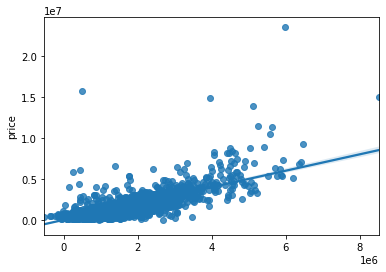

In [571]:
sns.regplot(x =ss_preds, y = y_test);
#Predicted vs actual on the test

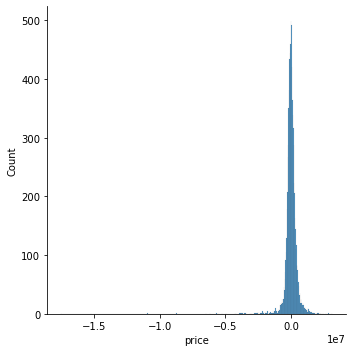

In [565]:
sns.displot(ss_preds - y_test)